In [1]:
''' Importing pandas for data manipulation
              sklearn for machine learing algorithms
              seaborn for data visualization
              matplotlib for viewing plots in notebook
              joblib for saving and retriving the model
              numpy for mathemtical calculations'''

import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import numpy as np

%matplotlib inline

In [2]:
# Reading the data from csv file
my_df = pd.read_csv('healthcare-dataset-stroke-data 2.csv')
my_df.info()
my_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
%pwd

'/content'

In [4]:
# Saving the path into my_path
my_path='/content'

### Checking for null values in the dataset

In [5]:
# Checking if there are any null values
my_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### There are 201 null values for BMI. Replace the null values from average of BMI.


In [6]:
# Replacing null values from average
avg = my_df['bmi'].mean()
my_df.bmi=(my_df.bmi.fillna(avg))

### Checking if there are any other null values left

In [7]:
# Rechecking the null values again. 
my_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## DATA VISUALIZATION

### Gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


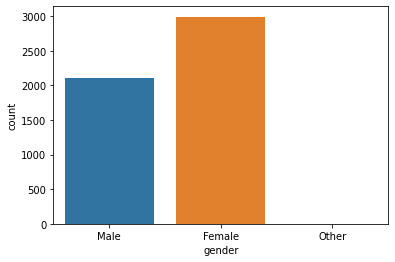

In [8]:
print(my_df.gender.value_counts())
ax = sns.countplot(data=my_df, x="gender")
plt.show()

#### This shows that there are more females than males

### Age

In [9]:
my_df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

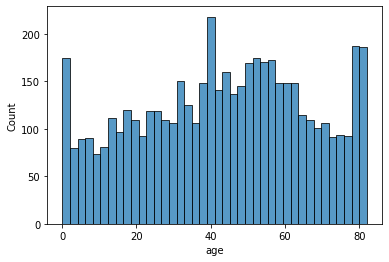

In [10]:
# my_df.age.plot(kind='hist', bins=20)
# plt.xlabel("age")
# plt.show()
sns.histplot(my_df['age'],bins=40)

#### This shows that we have almost all the age groups in the dataset


### Hypertension

0    4612
1     498
Name: hypertension, dtype: int64


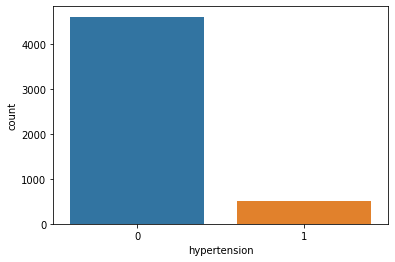

In [11]:
print(my_df.hypertension.value_counts())
ax = sns.countplot(data=my_df, x="hypertension")
plt.show()

#### This shows that maximum people in the datset does not have hypertension

### Heart Disease

0    4834
1     276
Name: heart_disease, dtype: int64


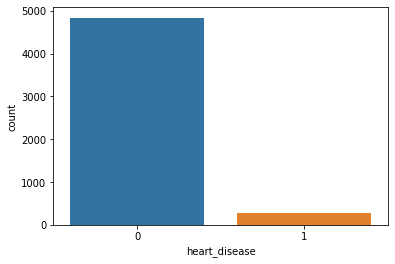

In [12]:
print(my_df.heart_disease.value_counts())
ax = sns.countplot(data=my_df, x="heart_disease")
plt.show()

#### This shows that maximum people in the dataset does not have heart disease

### Ever Married

Yes    3353
No     1757
Name: ever_married, dtype: int64


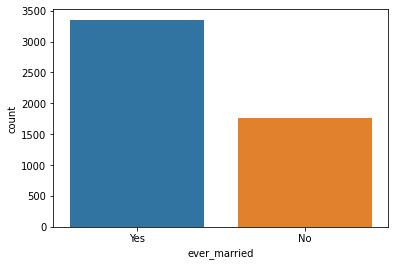

In [13]:
print(my_df.ever_married.value_counts())
ax = sns.countplot(data=my_df, x="ever_married")
plt.show()

#### This shows that we have more married people in the dataset than unmarried people

### Work type

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


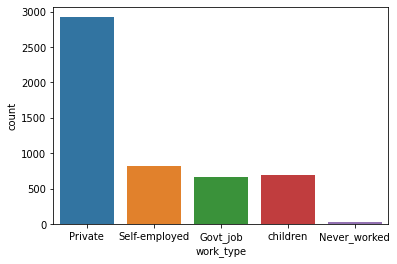

In [14]:
print(my_df.work_type.value_counts())
ax = sns.countplot(data=my_df, x="work_type")
plt.show()

#### This shows that maximum people in the dataset are doing private job

### Residence Type

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


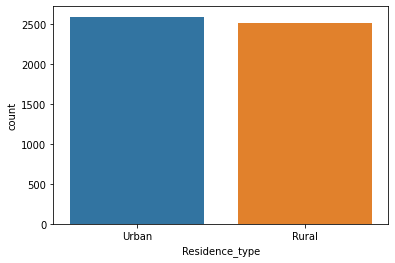

In [15]:
print(my_df.Residence_type.value_counts())
ax = sns.countplot(data=my_df, x="Residence_type")
plt.show()

#### This shows that we have almost equal number of urban and rural people in dataset

### Average Glucose Level

In [16]:
my_df['avg_glucose_level'].describe()


count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

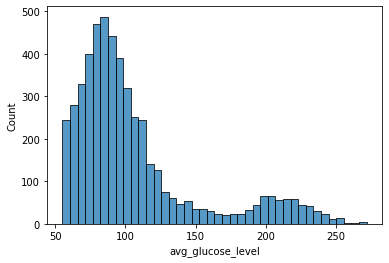

In [17]:
sns.histplot(my_df['avg_glucose_level'],bins=40)

#### This shows that maximum people had glucose level between 60 to 120

### BMI

In [18]:
my_df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

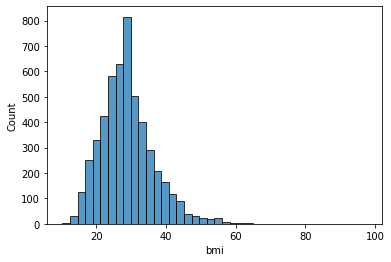

In [19]:
sns.histplot(my_df['bmi'],bins=40)

#### The normal BMI range is 18.5 to 24.9. This graph shows that maximum number of people in dataset does not have normal BMI

### Smoking Status

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


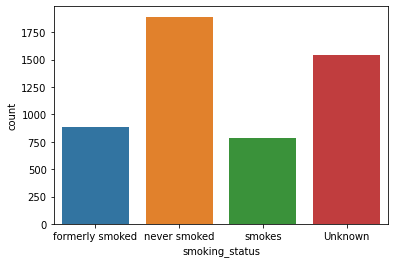

In [20]:
print(my_df.smoking_status.value_counts())
ax = sns.countplot(data=my_df, x="smoking_status")
plt.show()

#### This graph shows that majority of people in dataset never smoked

## Complete profile description

In [21]:
!pip install -U pandas-profiling

In [22]:
from pandas_profiling import ProfileReport

In [23]:
profile = ProfileReport(my_df)

In [24]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## SPLIT DATA INTO TRAINING, VALIDATION AND TEST DATASET

In [25]:
'''iloc() function enables us to select a particular cell of the dataset,it helps us select a value that belongs
 to a particular row or column from a set of values of a data frame '''
x = my_df.iloc[:, 1:-1].values
# assigning stroke column to y
y= my_df.iloc[:, -1].values

In [26]:
print(x)

[['Male' 67.0 0 ... 228.69 36.6 'formerly smoked']
 ['Female' 61.0 0 ... 202.21 28.893236911794673 'never smoked']
 ['Male' 80.0 0 ... 105.92 32.5 'never smoked']
 ...
 ['Female' 35.0 0 ... 82.99 30.6 'never smoked']
 ['Male' 51.0 0 ... 166.29 25.6 'formerly smoked']
 ['Female' 44.0 0 ... 85.28 26.2 'Unknown']]


In [27]:
# ONE HOT ENCODING

'''In one hot encoding each category value is converted into a new column and assigned a 
1 or 0 (notation for true/false) value to the column'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [28]:
print(x)

[[0.0 1.0 0.0 ... 1 228.69 36.6]
 [1.0 0.0 0.0 ... 0 202.21 28.893236911794673]
 [0.0 1.0 0.0 ... 1 105.92 32.5]
 ...
 [1.0 0.0 0.0 ... 0 82.99 30.6]
 [0.0 1.0 0.0 ... 0 166.29 25.6]
 [1.0 0.0 0.0 ... 0 85.28 26.2]]


In [29]:
print(y)

[1 1 1 ... 0 0 0]


In [30]:
from sklearn.model_selection import  train_test_split
# Splitting the data into train and test 
x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# Splitting the train data into train and validation dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, random_state=1)



## STANDARDIZATION

In [31]:
from sklearn.preprocessing import StandardScaler
'''Data standardization is the process of rescaling one or more attributes so that they have a mean 
   value of 0 and a standard deviation of 1 '''

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test = scaler.transform(x_test)

## MACHINE LEARNING MODELS

### Random Forest Classifier

In [32]:
# Importing RandomForestClassifier from sckit learn
from sklearn.ensemble import RandomForestClassifier

In [33]:
classifier = RandomForestClassifier()

In [34]:
# Fitting the train data set in classifier
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
# Predicting the accuracy through validation dataset
y_predicted = classifier.predict(x_valid)

In [36]:
print ("Accuracy on Training = %.4f" % accuracy_score(classifier.predict(x_train),y_train))
print ("Accuracy on Validation = %.4f" % accuracy_score(classifier.predict(x_valid),y_valid))

Accuracy on Training = 1.0000
Accuracy on Validation = 0.9609


### Decision Tree Classifier

In [37]:
# Importing DecisionTreeClassifier from sckit learn
from sklearn.tree import DecisionTreeClassifier 

In [38]:
# Fitting the train dataset in decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
print ("Accuracy on Training = %.4f" % accuracy_score(decision_tree_model.predict(x_train),y_train))
# Predicting accuracy through validation dataset
print ("Accuracy on Validation = %.4f" % accuracy_score(decision_tree_model.predict(x_valid),y_valid))

Accuracy on Training = 1.0000
Accuracy on Validation = 0.9059


In [40]:
# making a new directory name "decisionTree_model"
!mkdir decisionTree_model

In [41]:
# storing model the created directory through joblib
decisionTree_model_name = f'{my_path}/decisionTree_model/decisionTree_model_final.sav'
joblib.dump(classifier,decisionTree_model_name)

['/content/decisionTree_model/decisionTree_model_final.sav']

In [42]:
# Checking if the file is present in the diectory
!ls decisionTree_model

decisionTree_model_final.sav


### K nearest neighbour

In [43]:
# importing KNeighborsClassifier from sckit learn
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Fitting the train dataset in k_neighbour model
k_neighbour = KNeighborsClassifier()
k_neighbour.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
print ("Accuracy on Training = %.4f" % accuracy_score(k_neighbour.predict(x_train),y_train))
# Predicting the accuracy though validation dataset
print ("Accuracy on Validation = %.4f" % accuracy_score(k_neighbour.predict(x_valid),y_valid))

Accuracy on Training = 0.9523
Accuracy on Validation = 0.9621


## Hyperparameter tunining

### KNN Hyperparameter tuning

In [46]:
# Performing hyperparameter tuning in KNN to check what value of n_neighbour will give best results

''' importing GridSearchCV - this will help to loop through predefined hyperparameters and fit the
 model on training set. So, in the end, we can select the best parameters from the listed hyperparameters. 
 
 cv - cross validation'''

from sklearn.model_selection import GridSearchCV
classification = GridSearchCV(k_neighbour,{
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'weights':['uniform', 'distance']
},cv=10,return_train_score = False)
''' Here I'm testing values of training set '''
classification.fit(x_train,y_train)
classification.cv_results_

{'mean_fit_time': array([0.01282496, 0.01325846, 0.0125031 , 0.01223242, 0.01249974,
        0.01217504, 0.01226897, 0.01221151, 0.01224148, 0.01222632,
        0.0121593 , 0.01247454, 0.01293218, 0.01215332, 0.01226861,
        0.01218367, 0.01221783, 0.01223357, 0.01220164, 0.01305971,
        0.01232998, 0.01274669, 0.0126349 , 0.01243637, 0.012309  ,
        0.01315694, 0.01221719, 0.01236308, 0.01274116, 0.01226358,
        0.01231112, 0.01213644, 0.01219118, 0.01253841, 0.01229944,
        0.01218495, 0.01221046, 0.01263714, 0.0131259 , 0.01256664]),
 'mean_score_time': array([0.03109007, 0.02136834, 0.03371453, 0.02269061, 0.03480811,
        0.02480664, 0.03597107, 0.02700906, 0.03655529, 0.02887516,
        0.0373596 , 0.02975128, 0.03858521, 0.03036981, 0.03874359,
        0.03116081, 0.03992646, 0.03199553, 0.0403147 , 0.03376074,
        0.04265511, 0.03242733, 0.04153476, 0.03339303, 0.04263103,
        0.03325763, 0.0425735 , 0.03419216, 0.04585531, 0.03474681,
        0.

In [47]:
#Converting result value to a data frame
df = pd.DataFrame(classification.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012825,0.000708,0.031090,0.002991,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.929664,0.920489,0.920489,0.923547,0.908257,0.896024,0.892966,0.917431,0.911315,0.917431,0.913761,0.011178,38
1,0.013258,0.001585,0.021368,0.002338,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.929664,0.920489,0.920489,0.923547,0.908257,0.896024,0.892966,0.917431,0.911315,0.917431,0.913761,0.011178,38
2,0.012503,0.000728,0.033715,0.003686,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.954128,0.951070,0.951070,0.948012,0.951070,0.951070,0.944954,0.951070,0.941896,0.951070,0.949541,0.003419,27
3,0.012232,0.000295,0.022691,0.000715,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.929664,0.920489,0.920489,0.923547,0.908257,0.896024,0.892966,0.917431,0.911315,0.917431,0.913761,0.011178,38
4,0.012500,0.000996,0.034808,0.002486,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.944954,0.944954,0.944954,0.944954,0.954128,0.948012,0.935780,0.935780,0.932722,0.941896,0.942813,0.006124,35
5,0.012175,0.000212,0.024807,0.001228,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.944954,0.941896,0.932722,0.944954,0.941896,0.951070,0.929664,0.932722,0.929664,0.938838,0.938838,0.006974,37
6,0.012269,0.000206,0.035971,0.002371,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.954128,0.957187,0.948012,0.954128,0.951070,0.951070,0.948012,0.948012,0.941896,0.954128,0.950765,0.004204,18
7,0.012212,0.000160,0.027009,0.001952,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.948012,0.948012,0.935780,0.944954,0.941896,0.944954,0.932722,0.938838,0.923547,0.938838,0.939755,0.007243,36
8,0.012241,0.000151,0.036555,0.001363,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.954128,0.954128,0.948012,0.954128,0.951070,0.954128,0.948012,0.944954,0.938838,0.948012,0.949541,0.004787,26
9,0.012226,0.000219,0.028875,0.002525,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.954128,0.951070,0.941896,0.948012,0.948012,0.951070,0.944954,0.938838,0.923547,0.948012,0.944954,0.008319,34


In [48]:
#Displaying K and mean_test_score data
df[['param_n_neighbors','param_weights','mean_test_score']]



,param_n_neighbors,param_weights,mean_test_score
0,1,uniform,0.913761
1,1,distance,0.913761
2,2,uniform,0.949541
3,2,distance,0.913761
4,3,uniform,0.942813
5,3,distance,0.938838
6,4,uniform,0.950765
7,4,distance,0.939755
8,5,uniform,0.949541
9,5,distance,0.944954


Text(0.5, 1.0, 'K vs Mean_test_score')

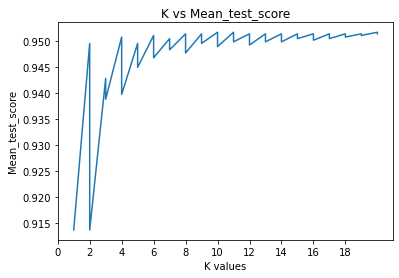

In [49]:
#plotting K vs mean_test_score
plt.plot(df.param_n_neighbors,df.mean_test_score)
plt.xlabel("K values")
plt.xticks(range(0,20,2))
plt.ylabel("Mean_test_score")
plt.title("K vs Mean_test_score")

In [50]:
#Rebuilding model with n_neighbors = 10
k_neighbour = KNeighborsClassifier(n_neighbors=10)
k_neighbour.fit(x_train, y_train)

print ("Accuracy on Training = %.4f" % accuracy_score(k_neighbour.predict(x_train),y_train))
# Checking the accuracy through validation dataset
print ("Accuracy on Validation = %.4f" % accuracy_score(k_neighbour.predict(x_valid),y_valid))

Accuracy on Training = 0.9517
Accuracy on Validation = 0.9633


In [51]:
# creating a new directory named knn_model
!mkdir knn_model
# storing the model in the directory through joblib library
knn_model_name = f'{my_path}/knn_model/knn_model_final.sav'
joblib.dump(k_neighbour,knn_model_name)

['/content/knn_model/knn_model_final.sav']

In [52]:
# checking of the model is successfully saved
!ls knn_model

knn_model_final.sav


### Random forest- hyper parameter tuning


In [53]:
# Performing hyperparameter tuning in Random forest to check what value of n_estimators will give best results

''' importing GridSearchCV - this will help to loop through predefined hyperparameters and fit the
 model on training set. So, in the end, we can select the best parameters from the listed hyperparameters. 
 
 cv - cross validation'''

from sklearn.model_selection import GridSearchCV
classification1 = GridSearchCV(classifier,{
    'n_estimators':[20,40,60,80,100],
    'criterion': ['gini','entropy'],
     'max_features': ['auto','sqrt', 'log2']
},cv=5,return_train_score = False)
''' Here I'm testing values of training set '''
classification1.fit(x_train,y_train)
classification1.cv_results_

{'mean_fit_time': array([0.06466565, 0.11643395, 0.16779237, 0.22466822, 0.27893381,
        0.05506225, 0.11288371, 0.16951785, 0.22038612, 0.2817246 ,
        0.05693817, 0.11474595, 0.16630569, 0.2220336 , 0.27611709,
        0.07055197, 0.13384008, 0.19165659, 0.26030006, 0.32407551,
        0.06445985, 0.12979684, 0.18974862, 0.25644007, 0.31630349,
        0.06528153, 0.12798786, 0.19306259, 0.26226902, 0.32163744]),
 'mean_score_time': array([0.00440583, 0.00727458, 0.01037097, 0.01367702, 0.01726451,
        0.00396376, 0.00740457, 0.01035209, 0.01458697, 0.01694217,
        0.00413857, 0.00736752, 0.01038647, 0.01369953, 0.01847944,
        0.00429192, 0.00748196, 0.01030803, 0.01353321, 0.0166091 ,
        0.00397134, 0.0080379 , 0.01097326, 0.01390719, 0.01685176,
        0.00400648, 0.00799007, 0.0113555 , 0.01379776, 0.01689343]),
 'mean_test_score': array([0.94862385, 0.94954128, 0.95015291, 0.95015291, 0.95045872,
        0.94923547, 0.94923547, 0.94984709, 0.95076453, 0

In [54]:
#Converting result value to a data frame
df = pd.DataFrame(classification1.cv_results_)
classification1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
#Displaying n_estimators,criterion,max_features and mean_test_score data
df[['param_n_estimators','param_criterion','param_max_features','mean_test_score']]


,param_n_estimators,param_criterion,param_max_features,mean_test_score
0,20,gini,auto,0.948624
1,40,gini,auto,0.949541
2,60,gini,auto,0.950153
3,80,gini,auto,0.950153
4,100,gini,auto,0.950459
5,20,gini,sqrt,0.949235
6,40,gini,sqrt,0.949235
7,60,gini,sqrt,0.949847
8,80,gini,sqrt,0.950765
9,100,gini,sqrt,0.949235


Text(0.5, 1.0, 'n_estimators vs Mean_test_score')

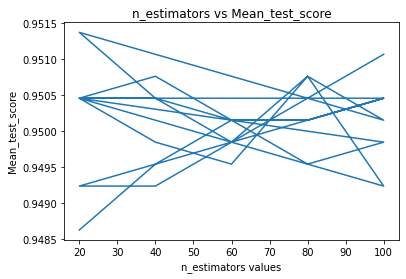

In [56]:
#plotting n_estimators vs mean_test_score
plt.plot(df.param_n_estimators,df.mean_test_score)
plt.xlabel("n_estimators values")
plt.ylabel("Mean_test_score")
plt.title("n_estimators vs Mean_test_score")

In [57]:
#Rebuilding model with n_estimators = 20
classifier = RandomForestClassifier(n_estimators=80, criterion='entropy', max_features='log2')
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
classifier.predict(x_valid)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
print ("Accuracy on Training = %.4f" % accuracy_score(classifier.predict(x_train),y_train))
# Predicting accuracy through validation dataset
print ("Accuracy on Validation = %.4f" % accuracy_score(classifier.predict(x_valid),y_valid))

Accuracy on Training = 1.0000
Accuracy on Validation = 0.9621


In [60]:
# Creating a new directory named randomforest_model
!mkdir randomforest_model

In [61]:
# Storing the random forest model in that directory
randomforest_model_name = f'{my_path}/randomforest_model/randomforest_model_final.sav'
joblib.dump(classifier,randomforest_model_name)

['/content/randomforest_model/randomforest_model_final.sav']

In [62]:
# Checking if the model has been successfully saved
!ls randomforest_model

randomforest_model_final.sav


## Evaluating test set accuracy with the trained model

In [63]:
# Loading the saved model through joblib
randomforest_loaded = joblib.load(f'{my_path}/randomforest_model/randomforest_model_final.sav')

In [64]:
# Predicting the results through test dataset
y_test_pred1 = randomforest_loaded.predict(x_test)

In [65]:
# Printing the accuracy by comparing actual and predicted values
# Random Forest
print(accuracy_score(y_test,y_test_pred1),
      matthews_corrcoef(y_test,y_test_pred1),f1_score(y_test,y_test_pred1))

0.9422700587084148 0.12531384042745283 0.03278688524590164


In [66]:
# Loading the saved model through joblib
decisiontree_loaded = joblib.load(f'{my_path}/decisionTree_model/decisionTree_model_final.sav')

In [67]:
# Predicting the results through test dataset
y_test_pred2 = decisiontree_loaded.predict(x_test)

In [68]:
# Printing the accuracy by comparing actual and predicted values
# Decision tree
print(accuracy_score(y_test,y_test_pred2),
      matthews_corrcoef(y_test,y_test_pred2),f1_score(y_test,y_test_pred2))

0.9393346379647749 0.05100816581710731 0.03125


In [69]:
# Loading the saved model through joblib
knn_loaded= joblib.load(f'{my_path}/knn_model/knn_model_final.sav')

In [70]:
# Predicting the results through test dataset
y_test_pred3 = knn_loaded.predict(x_test)

In [71]:
# Printing the accuracy by comparing actual and predicted values
# K nearest neighbour
print(accuracy_score(y_test,y_test_pred3),
      matthews_corrcoef(y_test,y_test_pred3),f1_score(y_test,y_test_pred3))

0.9412915851272016 0.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
